# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [116]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [117]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

628

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [118]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url =  url + "&q=" + city.replace(" ","+")
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data 
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | upernavik
Processing Record 2 of Set 1 | leningradskiy
Processing Record 3 of Set 1 | pevek
Processing Record 4 of Set 1 | port augusta
Processing Record 5 of Set 1 | bonavista
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | airai
Processing Record 8 of Set 1 | saldanha
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | busselton
Processing Record 11 of Set 1 | trinidad
Processing Record 12 of Set 1 | zhuhai
Processing Record 13 of Set 1 | butaritari
Processing Record 14 of Set 1 | narsaq
Processing Record 15 of Set 1 | mataura
Processing Record 16 of Set 1 | cape town
Processing Record 17 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 18 of Set 1 | qaanaaq
Processing Record 19 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 20 of Set 1 | hilo
Processing Record 21 of Set 1 | castro
Processing Record 22 of Se

Processing Record 38 of Set 4 | karistos
City not found. Skipping...
Processing Record 39 of Set 4 | mount isa
Processing Record 40 of Set 4 | puerto escondido
Processing Record 41 of Set 4 | iralaya
Processing Record 42 of Set 4 | moses lake
Processing Record 43 of Set 4 | plettenberg bay
Processing Record 44 of Set 4 | padang
Processing Record 45 of Set 4 | ushtobe
Processing Record 46 of Set 4 | pangnirtung
Processing Record 47 of Set 4 | chokwe
Processing Record 48 of Set 4 | ust-nera
Processing Record 49 of Set 4 | ulladulla
Processing Record 0 of Set 5 | dianopolis
City not found. Skipping...
Processing Record 1 of Set 5 | nome
Processing Record 2 of Set 5 | nouakchott
Processing Record 3 of Set 5 | kachug
Processing Record 4 of Set 5 | payo
Processing Record 5 of Set 5 | sangar
Processing Record 6 of Set 5 | hay river
Processing Record 7 of Set 5 | haibowan
City not found. Skipping...
Processing Record 8 of Set 5 | meyungs
City not found. Skipping...
Processing Record 9 of Set 5

City not found. Skipping...
Processing Record 25 of Set 8 | cayenne
Processing Record 26 of Set 8 | truth or consequences
Processing Record 27 of Set 8 | pithapuram
Processing Record 28 of Set 8 | berbera
Processing Record 29 of Set 8 | saint-augustin
Processing Record 30 of Set 8 | barawe
City not found. Skipping...
Processing Record 31 of Set 8 | kui buri
Processing Record 32 of Set 8 | batangafo
Processing Record 33 of Set 8 | san patricio
Processing Record 34 of Set 8 | shimanovsk
Processing Record 35 of Set 8 | fort frances
Processing Record 36 of Set 8 | shirokiy
Processing Record 37 of Set 8 | filadelfia
Processing Record 38 of Set 8 | farmington
Processing Record 39 of Set 8 | manggar
Processing Record 40 of Set 8 | pashiya
Processing Record 41 of Set 8 | ankeny
Processing Record 42 of Set 8 | wysokie mazowieckie
Processing Record 43 of Set 8 | tuatapere
Processing Record 44 of Set 8 | boma
Processing Record 45 of Set 8 | copiapo
Processing Record 46 of Set 8 | arlit
Processing

Processing Record 14 of Set 12 | pacific grove
Processing Record 15 of Set 12 | mattru
Processing Record 16 of Set 12 | son la
Processing Record 17 of Set 12 | kushiro
Processing Record 18 of Set 12 | gilazi
City not found. Skipping...
Processing Record 19 of Set 12 | jimma
Processing Record 20 of Set 12 | bubaque
Processing Record 21 of Set 12 | wuwei
Processing Record 22 of Set 12 | iqaluit
Processing Record 23 of Set 12 | veraval
Processing Record 24 of Set 12 | porto nacional
Processing Record 25 of Set 12 | kahului
Processing Record 26 of Set 12 | kysyl-syr
Processing Record 27 of Set 12 | verkhoyansk
Processing Record 28 of Set 12 | jaisalmer
Processing Record 29 of Set 12 | taboga
Processing Record 30 of Set 12 | teremia mare
Processing Record 31 of Set 12 | shenjiamen
Processing Record 32 of Set 12 | mabaruma
Processing Record 33 of Set 12 | aripuana
Processing Record 34 of Set 12 | quelimane
Processing Record 35 of Set 12 | batagay-alyta
Processing Record 36 of Set 12 | aksark

In [119]:
city_data_df = pd.DataFrame(city_data)
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,upernavik,72.7868,-56.1549,16.52,87,100,9.17,GL,1668907471
1,leningradskiy,69.3833,178.4167,-12.87,98,100,5.75,RU,1668907471
2,pevek,69.7008,170.3133,-16.73,100,99,7.58,RU,1668907471
3,port augusta,-32.5000,137.7667,69.30,32,6,18.54,AU,1668907472
4,bonavista,48.6499,-53.1147,34.36,62,46,20.80,CA,1668907473
...,...,...,...,...,...,...,...,...,...
573,dabat,12.9842,37.7650,53.04,59,6,4.41,ET,1668907755
574,cap-aux-meules,47.3821,-61.8597,28.45,74,20,5.75,CA,1668907757
575,banjar,-8.1900,114.9675,84.13,70,91,3.29,ID,1668907758
576,galveston,29.3669,-94.9669,46.49,91,100,1.99,US,1668907758


In [120]:
count = city_data_df.describe()
count

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,5.780000e+02
mean,21.342156,17.633142,51.500381,74.228374,58.778547,7.425294,1.668908e+09
std,32.994917,90.605705,27.046243,19.183139,42.213078,5.920624,1.002285e+02
min,-54.800000,-179.166700,-29.130000,9.000000,0.000000,0.000000,1.668907e+09
25%,-6.312350,-59.716650,33.817500,62.250000,9.250000,3.247500,1.668908e+09
50%,26.939900,24.908950,59.070000,78.000000,75.000000,5.750000,1.668908e+09
75%,48.170100,92.522575,73.435000,89.000000,100.000000,9.930000,1.668908e+09
max,78.218600,179.316700,89.920000,100.000000,100.000000,45.990000,1.668908e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [121]:
low_humidity = city_data_df.loc[(city_data_df["Humidity"] > 100)]
low_humidity
#new_data = cities_df[cities_df["City"] != "paita"]
#new_data.describe()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [122]:
#  Get the indices of cities that have humidity over 100%.
humidity_data = low_humidity.index
humidity_data

Int64Index([], dtype='int64')

In [123]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_data_df.drop(humidity_data,inplace = False)
clean_city_data.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,upernavik,72.7868,-56.1549,16.52,87,100,9.17,GL,1668907471
1,leningradskiy,69.3833,178.4167,-12.87,98,100,5.75,RU,1668907471
2,pevek,69.7008,170.3133,-16.73,100,99,7.58,RU,1668907471
3,port augusta,-32.5000,137.7667,69.30,32,6,18.54,AU,1668907472
4,bonavista,48.6499,-53.1147,34.36,62,46,20.80,CA,1668907473


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Text(0, 0.5, 'Max Temperature (F)')

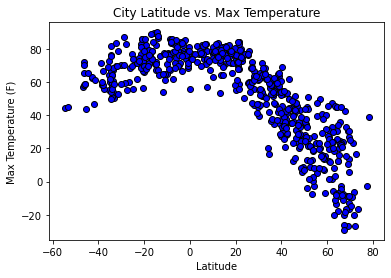

In [124]:
x_axis = clean_city_data["Lat"]
y_axis = clean_city_data["Max Temp"]
plt.scatter(x_axis, y_axis, marker = "o", facecolors = 'blue' , edgecolors = "black")
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

## Latitude vs. Humidity Plot

Text(0, 0.5, 'Humidity (%)')

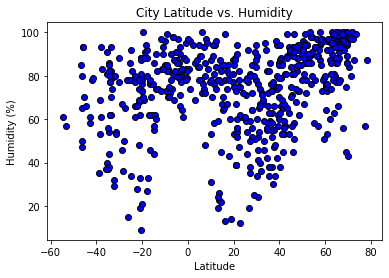

In [125]:
x_axis = clean_city_data["Lat"]
y_axis = clean_city_data["Humidity"]
plt.scatter(x_axis, y_axis, marker = "o", facecolors = 'blue' , edgecolors = "black")
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

## Latitude vs. Cloudiness Plot

Text(0, 0.5, 'Cloudiness (%)')

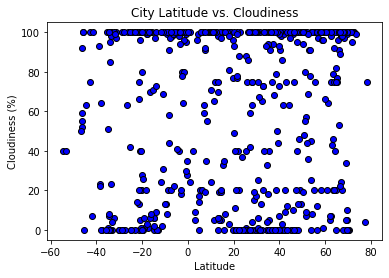

In [126]:
x_axis = clean_city_data["Lat"]
y_axis = clean_city_data["Cloudiness"]
plt.scatter(x_axis, y_axis, marker = "o", facecolors = 'blue' , edgecolors = "black")
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

## Latitude vs. Wind Speed Plot

Text(0, 0.5, 'Wind Speed (mph)')

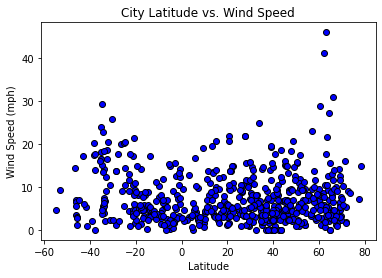

In [127]:
x_axis = clean_city_data["Lat"]
y_axis = clean_city_data["Wind Speed"]
plt.scatter(x_axis, y_axis, marker = "o", facecolors = 'blue' , edgecolors = "black")
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

## Linear Regression

In [128]:
north_hemi = clean_city_data.loc[clean_city_data["Lat"] >= 0] 
south_hemi = clean_city_data.loc[clean_city_data["Lat"] < 0] 

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7481501852174406


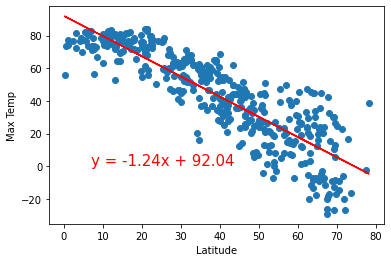

In [129]:
x_values = north_hemi["Lat"] 
y_values = north_hemi["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(7,1),fontsize = 15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-value is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.3552788781161212


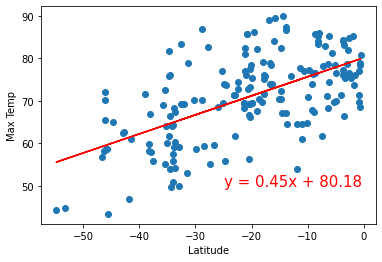

In [148]:
x_values = south_hemi["Lat"]
y_values = south_hemi["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,50),fontsize = 15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-value is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.11538439253973991


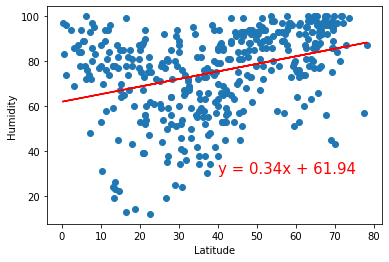

In [145]:
x_values = north_hemi["Lat"]
y_values = north_hemi["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values,y_values)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,30),fontsize = 15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.09885947561812922


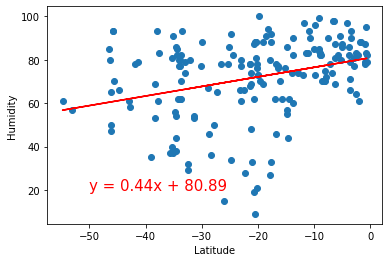

In [146]:
x_values = south_hemi["Lat"]
y_values = south_hemi["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize = 15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0188476286888589


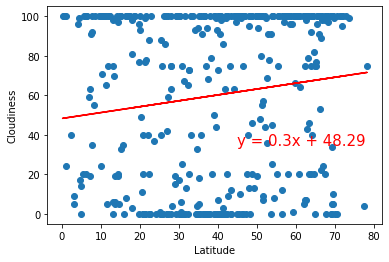

In [152]:
x_values = north_hemi["Lat"]
y_values = north_hemi["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,35),fontsize = 15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.03908358968385854


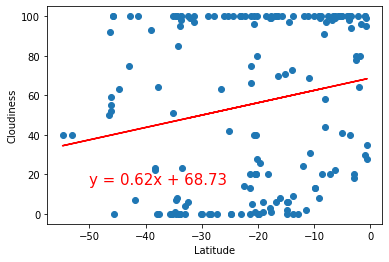

In [156]:
x_values = south_hemi["Lat"]
y_values = south_hemi["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,15),fontsize = 15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.00832804166709885


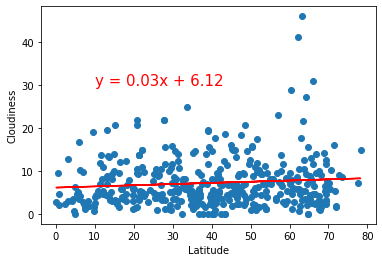

In [158]:
x_values = north_hemi["Lat"]
y_values = north_hemi["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,30),fontsize = 15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
print(f"The r-value is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.0711120223694043


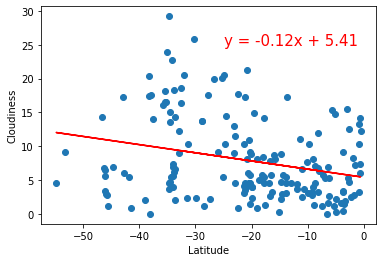

In [157]:
x_values = south_hemi["Lat"]
y_values = south_hemi["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,25),fontsize = 15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
print(f"The r-value is: {rvalue**2}")
plt.show()

In [137]:
city_data_df.to_csv('cities.csv')